In [3]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.formula.api as sm

#Constants
data_file = "Zillow_pivot_cleaned.csv"
label_file = "Phoenix_Zillow_Codes.xlsx"

# Read cleaned Zillow data and labels 

In [4]:
labelsdf = pd.read_excel(label_file)
labelsdf = labelsdf.drop(labelsdf.columns[2],axis=1)
labelsdf

,code,description
0,C36159_BSICG,median market value of buyer seller index cross
1,C36159_BSICT,median market value of buyer seller index cros...
2,C36159_DOZ,median market value of days on zillow
3,C36159_FOR10K,"median market value of foreclosures per 10,000..."
4,C36159_MDLNSAH,median market value of median daily listings -...
5,C36159_MDLSAAH,median market value of median daily listings -...
6,C36159_MLNSAH,median market value of monthly listings - nsa ...
7,C36159_MLSAAH,median market value of monthly listings - sa -...
8,C36159_MTURN,median market value of monthly turnover
9,C36159_NMLNSAH,median market value of new monthly listings - ...


In [5]:
# Read pivot data
df = pd.read_csv(data_file,parse_dates=['Date'])
# Set data type for series
for code in df.columns:
    if code!='Date':
        df[code] = df[code].astype(float)
print(df.dtypes)
df.head()

Date              datetime64[ns]
C36159_BSICG             float64
C36159_BSICT             float64
C36159_DOZ               float64
C36159_FOR10K            float64
C36159_MDLNSAH           float64
C36159_MDLSAAH           float64
C36159_MLNSAH            float64
C36159_MLSAAH            float64
C36159_MTURN             float64
C36159_NMLNSAH           float64
C36159_NMLSAAH           float64
C36159_SC                float64
C36159_SCBT              float64
C36159_SCMT              float64
C36159_SCSA              float64
C36159_SCSABT            float64
C36159_SCSAMT            float64
C36159_SCSATT            float64
C36159_SCTT              float64
C36159_SP                float64
C36159_SPBT              float64
C36159_SPFS              float64
C36159_SPMT              float64
C36159_SPTT              float64
C36159_STLR              float64
dtype: object


,Date,C36159_BSICG,C36159_BSICT,C36159_DOZ,C36159_FOR10K,C36159_MDLNSAH,C36159_MDLSAAH,C36159_MLNSAH,C36159_MLSAAH,C36159_MTURN,...,C36159_SCSABT,C36159_SCSAMT,C36159_SCSATT,C36159_SCTT,C36159_SP,C36159_SPBT,C36159_SPFS,C36159_SPMT,C36159_SPTT,C36159_STLR
0,2008-01-31,NaN,NaN,NaN,8.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-02-29,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-03-31,NaN,NaN,NaN,9.89,NaN,NaN,NaN,NaN,0.0032,...,482.0,384.0,291.0,238.0,221500.0,156900.0,NaN,244300.0,465500.0,NaN
3,2008-04-30,NaN,NaN,NaN,13.97,NaN,NaN,NaN,NaN,0.0039,...,487.0,349.0,260.0,314.0,212600.0,147400.0,NaN,240300.0,428200.0,NaN
4,2008-05-31,NaN,NaN,NaN,14.80,NaN,NaN,NaN,NaN,0.0042,...,526.0,372.0,257.0,335.0,204600.0,137300.0,NaN,233500.0,413900.0,NaN


# Plot all series to explore Zillow Data

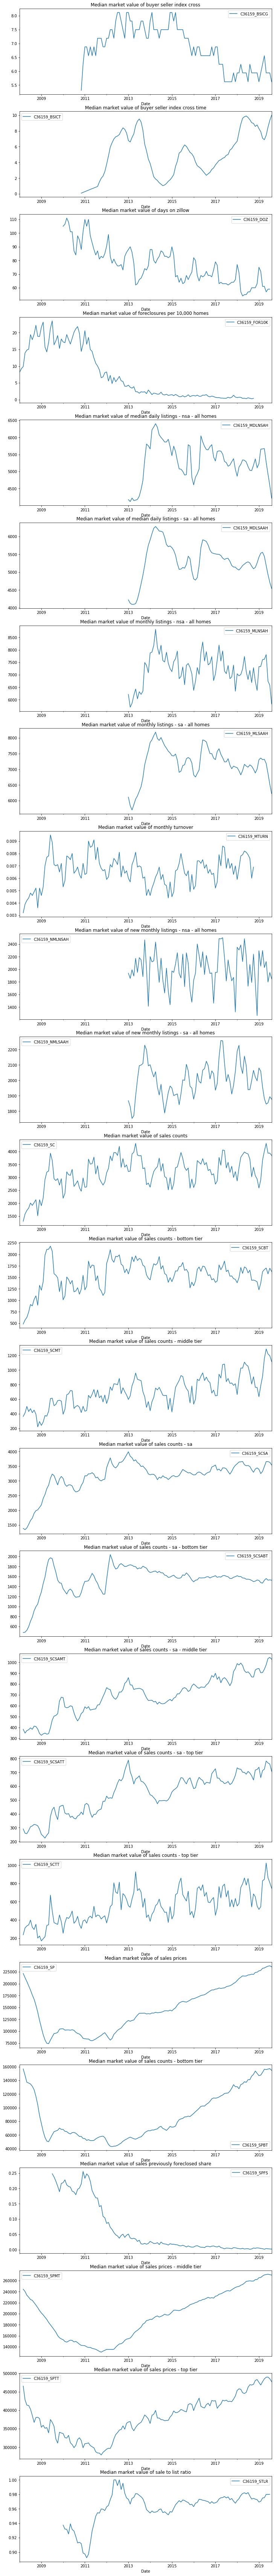

In [6]:
# Plot all series
series = len(df.columns)-1
figs = plt.figure(figsize=(12,5*series))
ax_count = 0
for code in df.columns:
    if code!="Date":
        plot_number = ax_count+1
        description = labelsdf[labelsdf["code"]==code].iat[0,1]
        ax = figs.add_subplot(series,1,plot_number)
        df.plot(x='Date',y=code,ax=ax)
        ax.set_title(description.capitalize())
        ax_count += 1
figs.savefig(f"charts.png")

### Charts of Interest for Phoenix, AZ across tier comparison
* C36159_SCSABT - Monthly Median Sales Count Bottom Tier
* C36159_SCSAMT - Monthly Median Sales Count Middle Tier
* C36159_SCSATT - Monthly Median Sales Count Middle Tier
* C36159_SPBT - Monthly Median Sales Price Bottom Tier
* C36159_SPMT - Monthly Median Sales Price Middle Tier
* C36159_SPTT - Monthly Median Sales Price Top Tier 
* C36159_SP - All homes sale prices
* C36159_FOR10K - Foreclosure rate per 10,000 homes

## Sales Price Ranges

In [17]:
print(f"Bottom {df['C36159_SPBT'].min()} - {df['C36159_SPBT'].max()}")
print(f"Middle {df['C36159_SPMT'].min()} - {df['C36159_SPMT'].max()}")
print(f"Top {df['C36159_SPTT'].min()} - {df['C36159_SPTT'].max()}")

Bottom 43100.0 - 157300.0
Middle 130300.0 - 271500.0
Top 279100.0 - 489900.0


# Plot Sales Counts and Prices by Tier with Foreclosure Rate

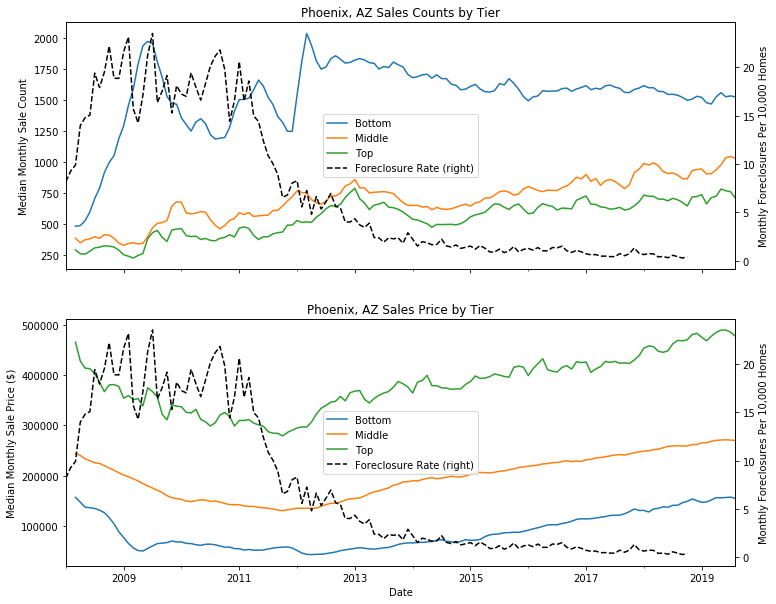

In [10]:
monthly_fig = plt.figure(figsize=(12,10))

ax_count = monthly_fig.add_subplot(2,1,1)
df.plot(x='Date',y='C36159_SCSABT',label='Bottom',ax=ax_count)
df.plot(x='Date',y='C36159_SCSAMT',label='Middle',ax=ax_count)
df.plot(x='Date',y='C36159_SCSATT',label='Top',ax=ax_count)
df.plot(x='Date',y='C36159_FOR10K',label='Foreclosure Rate',style='k--',secondary_y=True,ax=ax_count)
ax_count.set_ylabel('Median Monthly Sale Count')
ax_count.right_ax.set_ylabel('Monthly Foreclosures Per 10,000 Homes')
ax_count.set_title('Phoenix, AZ Sales Counts by Tier')

ax_sales = monthly_fig.add_subplot(2,1,2)
df.plot(x='Date',y='C36159_SPBT',label='Bottom',ax=ax_sales)
df.plot(x='Date',y='C36159_SPMT',label='Middle',ax=ax_sales)
df.plot(x='Date',y='C36159_SPTT',label='Top',ax=ax_sales)
df.plot(x='Date',y='C36159_FOR10K',label='Foreclosure Rate',style='k--',secondary_y=True,ax=ax_sales)
ax_sales.set_ylabel('Median Monthly Sale Price ($)')
ax_sales.right_ax.set_ylabel('Monthly Foreclosures Per 10,000 Homes')
ax_sales.set_title('Phoenix, AZ Sales Price by Tier')

monthly_fig.savefig(f"Presentation/monthly_trends.png")

# Get tier changes by year

In [12]:
# Isolate tiers data
tiers = ['Date','C36159_SCSABT','C36159_SCSAMT','C36159_SCSATT','C36159_SPBT','C36159_SPMT','C36159_SPTT','C36159_FOR10K']
tiersdf = df.loc[2:,tiers].copy()

# Save change by year in datasets from OLS coefficients in csv
change_file = "Annual Changes.csv"
with open(change_file, 'w') as f:
    f.write("Code,Year,Slope,Change\n")
    for year in range(2008,2018):
        for _ in range(1,8):
            code = tiers[_]
            tier = tiersdf.loc[tiersdf['Date'].dt.year == year,['Date',code]].copy()
            tier["Year"] = year
            result = sm.ols(formula=f"Year ~ {code}", data=tier).fit()
            slope = round(result.params[1]*1e16,3)
            tier_min = tier[code].min()
            tier_max = tier[code].max()
            tier_diff = tier_max-tier_min
            if slope < 0:
                tier_diff = tier_min - tier_max
            else:                
                tier_diff = tier_max - tier_min
            year_result = f"{code},{year},{slope},{tier_diff}"
            print(year_result)
            f.write(f"{year_result}\n")
changesdf = pd.read_csv(change_file)
changesdf.head()
changes_pivot = changesdf.pivot_table(index="Year",columns=["Code"],values=["Change"],aggfunc='mean')
changes_pivot.head()

C36159_SCSABT,2008,4.996,706.0
C36159_SCSAMT,2008,-71.054,-68.0
C36159_SCSATT,2008,-13.323,-67.0
C36159_SPBT,2008,-0.043,-68400.0
C36159_SPMT,2008,-0.442,-38600.0
C36159_SPTT,2008,-0.156,-98400.0
C36159_FOR10K,2008,710.543,12.309999999999999
C36159_SCSABT,2009,-8.882,-682.0
C36159_SCSAMT,2009,0.0,350.0
C36159_SCSATT,2009,-4.441,-234.0
C36159_SPBT,2009,0.156,26700.0
C36159_SPMT,2009,-0.069,-47000.0
C36159_SPTT,2009,0.035,63700.0
C36159_FOR10K,2009,284.217,9.26
C36159_SCSABT,2010,-2.22,-225.0
C36159_SCSAMT,2010,31.086,214.0
C36159_SCSATT,2010,106.581,98.0
C36159_SPBT,2010,0.278,13300.0
C36159_SPMT,2010,-0.278,-10600.0
C36159_SPTT,2010,0.035,38400.0
C36159_FOR10K,2010,213.163,7.399999999999999
C36159_SCSABT,2011,17.764,414.0
C36159_SCSAMT,2011,0.0,161.0
C36159_SCSATT,2011,-35.527,-116.0
C36159_SPBT,2011,-0.486,-6500.0
C36159_SPMT,2011,0.208,11800.0
C36159_SPTT,2011,0.121,32600.0
C36159_FOR10K,2011,355.271,14.05
C36159_SCSABT,2012,-4.441,-497.0
C36159_SCSAMT,2012,0.0,163.0
C36159_SCSATT,20

Change                                                        \
Code C36159_FOR10K C36159_SCSABT C36159_SCSAMT C36159_SCSATT C36159_SPBT   
Year                                                                       
2008         12.31         706.0         -68.0         -67.0    -68400.0   
2009          9.26        -682.0         350.0        -234.0     26700.0   
2010          7.40        -225.0         214.0          98.0     13300.0   
2011         14.05         414.0         161.0        -116.0     -6500.0   
2012          4.28        -497.0         163.0         241.0     10900.0   

                              
Code C36159_SPMT C36159_SPTT  
Year                          
2008    -38600.0    -98400.0  
2009    -47000.0     63700.0  
2010    -10600.0     38400.0  
2011     11800.0     32600.0  
2012    -18800.0    -70100.0

# Plot Sales Count, Sales Prices and Foreclosure Rate Changes

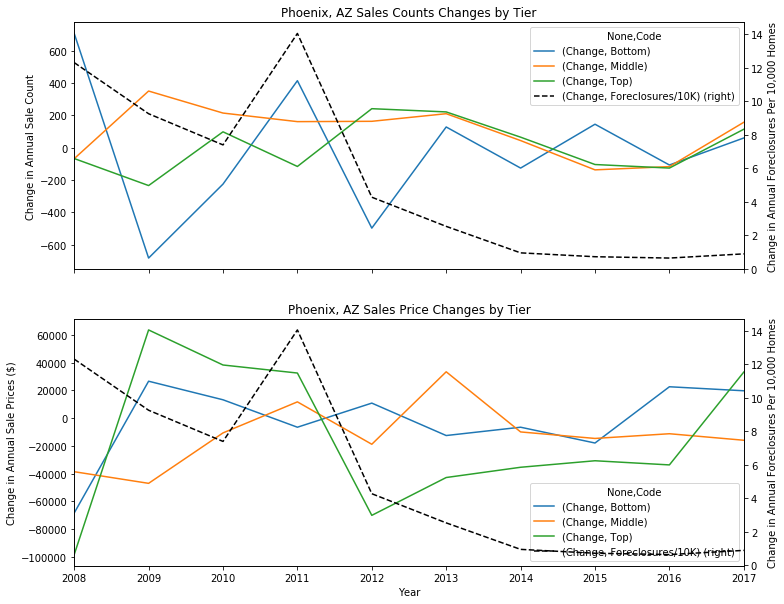

In [13]:
# Isolate and rename datasets
foreclosure_changes = changes_pivot.iloc[:,[0]].copy()
foreclosure_changes = foreclosure_changes.rename(columns={"C36159_FOR10K":"Foreclosures/10K"})
count_changes = changes_pivot.iloc[:,[1,2,3]].copy()
count_changes = count_changes.rename(columns={"C36159_SCSABT":"Bottom","C36159_SCSAMT":"Middle","C36159_SCSATT":"Top"})
sales_changes = changes_pivot.iloc[:,[4,5,6]].copy()
sales_changes = sales_changes.rename(columns={"C36159_SPBT":"Bottom","C36159_SPMT":"Middle","C36159_SPTT":"Top"})

change_fig = plt.figure(figsize=(12,10))

ax_count_change = change_fig.add_subplot(2,1,1)
count_changes.plot(xticks=count_changes.index,ax=ax_count_change)
foreclosure_changes.plot(style='k--',secondary_y=True,xticks=foreclosure_changes.index,ax=ax_count_change)
ax_count_change.set_ylabel('Change in Annual Sale Count')
ax_count_change.right_ax.set_ylabel('Change in Annual Foreclosures Per 10,000 Homes')
ax_count_change.set_title('Phoenix, AZ Sales Counts Changes by Tier')

ax_sales_change = change_fig.add_subplot(2,1,2)
sales_changes.plot(xticks=sales_changes.index,ax=ax_sales_change)
foreclosure_changes.plot(style='k--',secondary_y=True,xticks=foreclosure_changes.index,ax=ax_sales_change)
ax_sales_change.set_ylabel('Change in Annual Sale Prices ($)')
ax_sales_change.right_ax.set_ylabel('Change in Annual Foreclosures Per 10,000 Homes')
ax_sales_change.set_title('Phoenix, AZ Sales Price Changes by Tier')

change_fig.savefig(f"Presentation/annual_changes.png")